In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('weather.csv')
data = data.dropna()
data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


In [33]:
x=data.iloc[:,3:4].values
y=data.iloc[:, 2].values

In [34]:
x

array([[ 3.4],
       [ 4.4],
       [ 5.8],
       [ 7.2],
       [ 5.6],
       [ 5.8],
       [ 4.2],
       [ 5.6],
       [ 4. ],
       [ 5.4],
       [ 4.2],
       [ 7.2],
       [ 7.2],
       [ 6.2],
       [ 8.8],
       [ 8.4],
       [ 7.2],
       [ 7.2],
       [ 7.4],
       [ 8. ],
       [ 8.8],
       [ 9.2],
       [ 2.8],
       [ 1.2],
       [ 4.4],
       [ 6.8],
       [ 6.6],
       [ 4.4],
       [ 7. ],
       [ 2.6],
       [ 2.4],
       [ 1.6],
       [ 6.6],
       [ 3.8],
       [ 8.4],
       [ 6. ],
       [ 4.2],
       [ 4.2],
       [ 6.6],
       [10.4],
       [ 4.8],
       [ 4.2],
       [ 5. ],
       [ 4.4],
       [ 6.8],
       [ 6.4],
       [ 2.8],
       [ 6.6],
       [ 6.4],
       [ 1.6],
       [ 1.8],
       [ 4.4],
       [ 7.8],
       [ 6.2],
       [ 8.2],
       [ 5.2],
       [ 7.2],
       [ 8.8],
       [ 6.6],
       [ 9.6],
       [11.4],
       [ 8.8],
       [ 7.6],
       [12.6],
       [ 6.2],
       [ 7.4],
       [ 6

In [35]:
y

array([ 0. ,  3.6,  3.6, 39.8,  2.8,  0. ,  0.2,  0. ,  0. , 16.2,  0. ,
        0.2,  0. ,  0. ,  0. ,  0. ,  0. ,  1.2,  0.6,  0. ,  0. ,  0.4,
       25.8,  0.4,  0. ,  0. ,  0.2,  0. ,  0. ,  0.4, 22.6,  4.2,  0.2,
        6.6,  0. ,  0. ,  0. ,  4. ,  0. ,  0. ,  0.6,  0. ,  0. ,  0. ,
        0. ,  5.4,  1.4,  0. ,  0. ,  3.4,  6.4, 11. , 17.4,  0. ,  3.4,
        0. ,  0. , 14.4,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  2. ,  0. ,  0. ,  0. ,
        4.8,  0. , 18.8, 12.2,  0.8,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  5.2,  2.2,  0. ,  0. ,  1.8,  9. ,  1. ,  0. ,
       16.2,  0. ,  0. ,  0. ,  4.4, 11. ,  0.2,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  1.8,  0. ,  0. ,  0. ,  0. ,  0. , 10.4,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  3. ,  0. ,  0. ,  0. ,  0.2,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0.6,  6.4, 19.8,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  2.6,  0

In [36]:
from sklearn.linear_model import LinearRegression
lmodel=LinearRegression()


In [37]:
lmodel.fit(x,y)

LinearRegression()

In [38]:
lpreds=lmodel.predict(x)

In [39]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y, lpreds) ** 0.5

4.282586513440878

In [40]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)
poly.fit(x_poly, y)
lin2 = LinearRegression()
lin2.fit(x_poly, y)

LinearRegression()

In [41]:
ppreds=lin2.predict(x_poly)

In [42]:
mean_squared_error(y, ppreds) ** 0.5

4.279737817724065

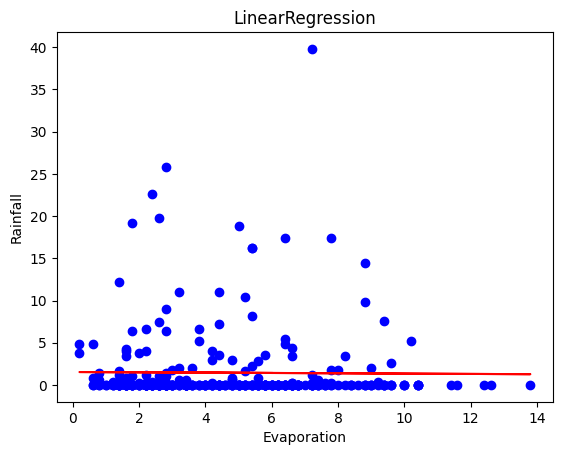

In [45]:
plt.scatter(x,y,color='blue')
plt.plot(x,lmodel.predict(x),color='red')
plt.title('LinearRegression')
plt.xlabel('Evaporation')
plt.ylabel('Rainfall')
plt.show()

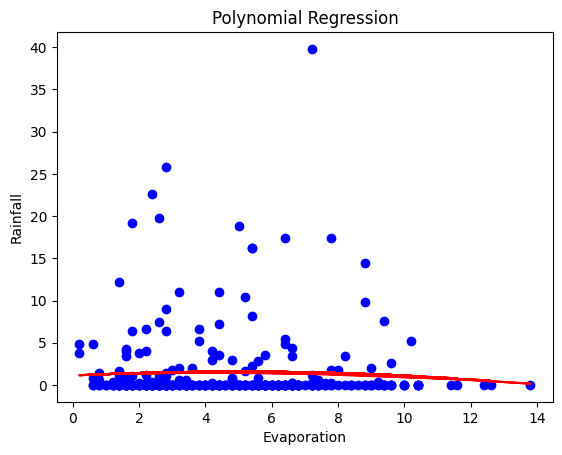

In [46]:
plt.scatter(x,y,color='blue')
plt.plot(x,lin2.predict(poly.fit_transform(x)),color='red')
plt.title('Polynomial Regression')
plt.xlabel('Evaporation')
plt.ylabel('Rainfall')
plt.show()